Data description    
The business meaning of each column in the data is as below    

Restaurant ID: The id for each restaurant    
Restaurant Name: The brand/restaurant name                
Country Code: In which country the restaurant is operating          
City: In which city the restaurant is operating               
Address: What is the address of the restaurant                 
Locality: What is the locality of the restaurant            
Locality Verbose: Detailed locality description        
Longitude: GPS longitude location                   
Latitude: GPS latitude location                                         
Cuisines: Various type of food offered                                      
Currency: The business currency                                         
Has Table booking: Is advance table booking facility available?                               
Has Online delivery: Does they take online food orders?                         
Is delivering now: Is is open now?                                         
Switch to order menu: Whether switch to order menu is available?                      
Price range: The price range of the restaurant                         
Votes: The number of people who voted for the rating                      
Average Cost for two: The typical cost for two people                        
Rating: The final rating of the restaurant                           

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

ZomatoData = pd.read_csv('C:/Users/HP/Desktop/Ivy/3.Python/Python Pred Modeling All notebooks + Datasets.zip (Unzipped Files)/Python Datasets/Regression Datasets/ZomatoData.csv',encoding = 'latin')

print('Shape before removing duplicates:',ZomatoData.shape)

ZomatoData.drop_duplicates

print('Shape after removing duplicates:',ZomatoData.shape)

ZomatoData.head()

Shape before removing duplicates: (9551, 19)
Shape after removing duplicates: (9551, 19)


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes,Average Cost for two,Rating
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,No,3,314,1100,4.8
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,Botswana Pula(P),Yes,No,No,No,3,591,1200,4.5
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",Botswana Pula(P),Yes,No,No,No,4,270,4000,4.4
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",Botswana Pula(P),No,No,No,No,4,365,1500,4.9
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",Botswana Pula(P),Yes,No,No,No,4,229,1500,4.8


# Problem Statement:

**Target Variable:** Rating   
**Predictors:** Restaurant ID, Restaurant Menu, Country Code, Menu etc.

# Type of Machine Learning

Since the Target Variable is Continuous, we will create **Supervised ML Regression Model**.

In [3]:
ZomatoData.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Price range', 'Votes',
       'Average Cost for two', 'Rating'],
      dtype='object')

# Distribution of Target Variable

<AxesSubplot:>

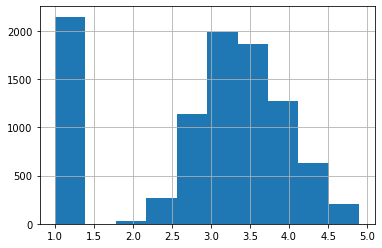

In [4]:
ZomatoData['Rating'].hist()

The data distribution of target variable is good enough for training the model

# Basic Data Exploration

In [5]:
ZomatoData.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Votes                   1012
Average Cost for two     140
Rating                    33
dtype: int64

In [6]:
ZomatoData.describe(include='all')

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes,Average Cost for two,Rating
count,9.551000e+03,9551,9551.000000,9551,9551,9551,9551,9551.000000,9551.000000,9542,9551,9551,9551,9551,9551,9551.000000,9551.000000,9551.000000,9551.000000
unique,NaN,7446,NaN,141,8918,1208,1265,NaN,NaN,1825,12,2,2,2,1,NaN,NaN,NaN,NaN
top,NaN,Cafe Coffee Day,NaN,New Delhi,"Dilli Haat, INA, New Delhi",Connaught Place,"Connaught Place, New Delhi",NaN,NaN,North Indian,Indian Rupees(Rs.),No,No,No,No,NaN,NaN,NaN,NaN
freq,NaN,83,NaN,5473,11,122,122,NaN,NaN,936,8652,8393,7100,9517,9551,NaN,NaN,NaN,NaN
mean,9.051128e+06,NaN,18.365616,NaN,NaN,NaN,NaN,64.126574,25.854381,NaN,NaN,NaN,NaN,NaN,NaN,1.804837,156.909748,1199.210763,2.891268
std,8.791521e+06,NaN,56.750546,NaN,NaN,NaN,NaN,41.467058,11.007935,NaN,NaN,NaN,NaN,NaN,NaN,0.905609,430.169145,16121.183073,1.128845
min,5.300000e+01,NaN,1.000000,NaN,NaN,NaN,NaN,-157.948486,-41.330428,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,1.000000
25%,3.019625e+05,NaN,1.000000,NaN,NaN,NaN,NaN,77.081343,28.478713,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,5.000000,250.000000,2.500000
50%,6.004089e+06,NaN,1.000000,NaN,NaN,NaN,NaN,77.191964,28.570469,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,31.000000,400.000000,3.200000
75%,1.835229e+07,NaN,1.000000,NaN,NaN,NaN,NaN,77.282006,28.642758,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,131.000000,700.000000,3.700000


In [7]:
ZomatoData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Currency              9551 non-null   object 
 11  Has Table booking     9551 non-null   object 
 12  Has Online delivery   9551 non-null   object 
 13  Is delivering now     9551 non-null   object 
 14  Switch to order menu  9551 non-null   object 
 15  Price range          

# Basic Data Exploration

The selected columns in this step are not final, further study will be done and then a final list will be created  

Restaurant ID: Qualitative. Rejected.                                                              
Restaurant Name: Qualitative. Rejected.            
Country Code: Categorical. Selected.                                                              
City: Categorical. Rejected. Too many unique levels, hence it will cause high dimensionality   
Address: Qualitative. Rejected.                    
Locality: Qualitative. Rejected.           
Locality Verbose: Qualitative. Rejected.                                      
Longitude: Continuous. Selected. This represents the location of restaurant        
Latitude: Continuous. Selected. This represents the location of restaurant        
Cuisines: Qualitative. Rejected. A new feature can be engineered from it.         
Currency: Categorical. Selected.           
Has Table booking: Categorical. Selected.          
Has Online delivery: Categorical. Selected.          
Is delivering now: Categorical. Selected.       
Switch to order menu: Categorical. Selected.           
Price range: Categorical. Selected.          
Votes: Continuous. Selected.           
Average Cost for two: Continuous. Selected.                      
Rating: Continuous. Selected. This is the Target Variable!                  


In this data the "Cuisines" column cannot be used directly because it will generate 1825 dummy variables!! Hence, we can count the number of cuisines offered, which can be a number, hence it can be used in ML.

In [8]:
# Function to count the number of cuisines
def cuisine_counter(inpStr):
    NumOfCuisines = len(str(inpStr).split(','))
    return(NumOfCuisines)

In [9]:
ZomatoData['CuisinesCount']=ZomatoData['Cuisines'].apply(cuisine_counter)
ZomatoData.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes,Average Cost for two,Rating,CuisinesCount
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,No,3,314,1100,4.8,3
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,Botswana Pula(P),Yes,No,No,No,3,591,1200,4.5,1
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",Botswana Pula(P),Yes,No,No,No,4,270,4000,4.4,4
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",Botswana Pula(P),No,No,No,No,4,365,1500,4.9,2
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",Botswana Pula(P),Yes,No,No,No,4,229,1500,4.8,2


# Removing Useless Columns

In [10]:
UselessCols = ['Restaurant ID','Restaurant Name','City','Address','Locality','Locality Verbose','Cuisines','Currency']

ZomatoData=ZomatoData.drop(UselessCols,axis=1)

ZomatoData.head()

,Country Code,Longitude,Latitude,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes,Average Cost for two,Rating,CuisinesCount
0,162,121.027535,14.565443,Yes,No,No,No,3,314,1100,4.8,3
1,162,121.014101,14.553708,Yes,No,No,No,3,591,1200,4.5,1
2,162,121.056831,14.581404,Yes,No,No,No,4,270,4000,4.4,4
3,162,121.056475,14.585318,No,No,No,No,4,365,1500,4.9,2
4,162,121.057508,14.584450,Yes,No,No,No,4,229,1500,4.8,2


# Visual Exploratory Data Analysis

# Bar Diagram for Categorical Variables

**Categorical Predictors:** 'Country Code', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu','Price range'

In [11]:
def PlotBarCharts(inpData,CategoricalCols):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    fig, subPlot = plt.subplots(nrows = 1, ncols = len(CategoricalCols), figsize = (20,6))
    fig.suptitle = ('Bar Charts of'+str(CategoricalCols))
    
    for colName, PlotNumber in zip(CategoricalCols,range(len(CategoricalCols))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[PlotNumber])

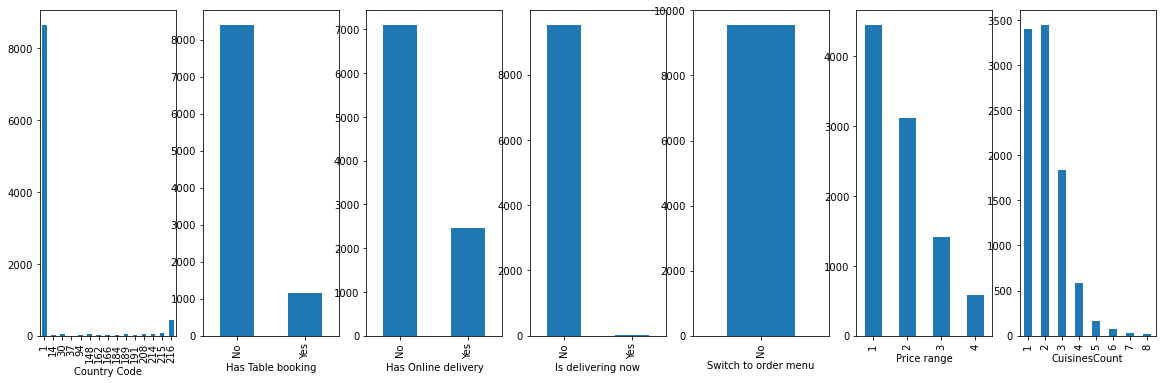

In [12]:
ColsToPlot =  ['Country Code', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 
               'Switch to order menu','Price range','CuisinesCount']

PlotBarCharts(ZomatoData,ColsToPlot)

# Bar Chart Interpretation

In this data, "Country Code", "Currency", "is delivering now" and "Switch to order menu" are too skewed. There is just one bar which is dominating and other categories have very less rows or there is just one value only. Such columns are not correlated with the target variable because there is no information to learn. The algorithms cannot find any rule like when the value is this then the target variable is that.    

Selected Categorical Variables: Only three categorical variables are selected for further analysis.           

**'Has Table booking', 'Has Online delivery', 'Price range','CuisinesCount'**            

# Histogram for Continuous Variables

In [13]:
ContinuousVariables = ['Votes','Average Cost for two','Rating','Longitude','Latitude']

array([[<AxesSubplot:title={'center':'Votes'}>,
        <AxesSubplot:title={'center':'Average Cost for two'}>],
       [<AxesSubplot:title={'center':'Rating'}>,
        <AxesSubplot:title={'center':'Longitude'}>],
       [<AxesSubplot:title={'center':'Latitude'}>, <AxesSubplot:>]],
      dtype=object)

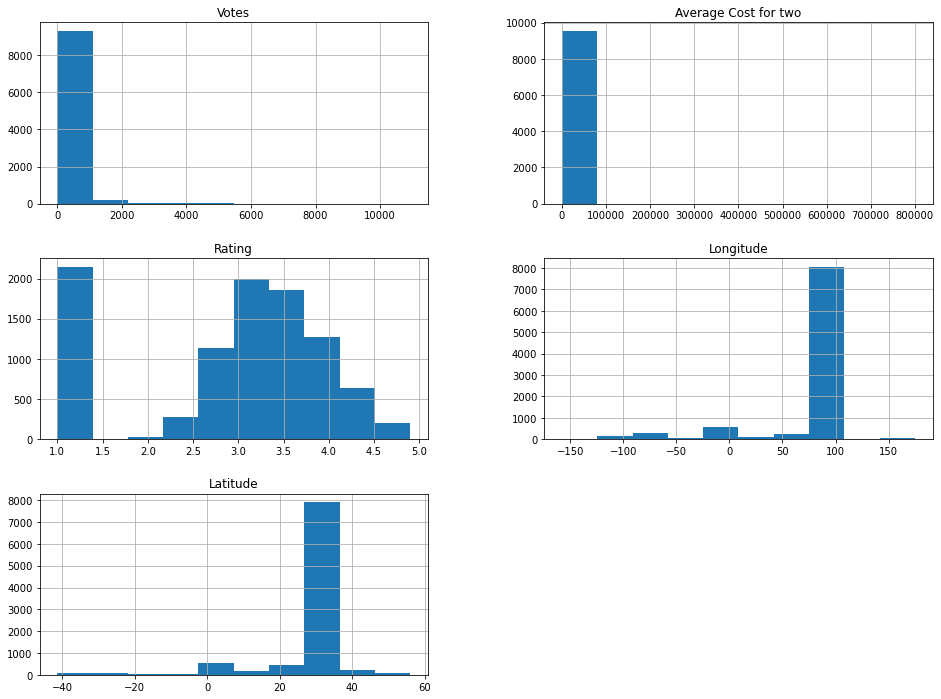

In [14]:
ZomatoData.hist(['Votes','Average Cost for two','Rating','Longitude','Latitude'],figsize=(16,12))

# Histogram Interpretation

The ideal outcome for histogram is a bell curve or slightly skewed bell curve. If there is too much skewness, then outlier treatment should be done and the column should be re-examined, if that also does not solve the problem then only reject the column.                

**Selected Continuous Columns:**                     
    
**Votes:** Selected!!!, Ouliers seen beyond 4000, need to treat them.                                                                                        
**Average Cost for two:** Rejected!!!, As the data is too positively skewed.                                                                       
**Rating:** Selected!!!                                          
**Longitude:** Selected!!!                                        
**Latitude:** Selected!!!                                                                    

# Outlier Treatment

In [15]:
ZomatoData['Votes'][ZomatoData['Votes']<4000].sort_values(ascending = False)

7863    3986
821     3848
3992    3697
3119    3591
1861    3569
        ... 
4801       0
4803       0
4805       0
4807       0
4784       0
Name: Votes, Length: 9532, dtype: int64

In [16]:
ZomatoData['Votes'][ZomatoData['Votes']>4000]=3986

array([[<AxesSubplot:title={'center':'Votes'}>]], dtype=object)

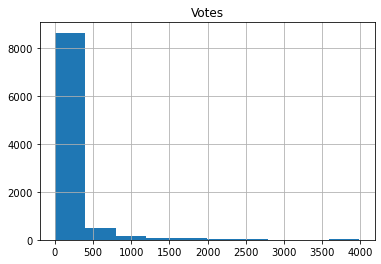

In [17]:
ZomatoData.hist('Votes')

# Missing Value Treatment

In [18]:
ZomatoData.isnull().sum()

Country Code            0
Longitude               0
Latitude                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Votes                   0
Average Cost for two    0
Rating                  0
CuisinesCount           0
dtype: int64

There are no missing values in the data.

# Feature Selection

# Continuous v/s Continuous: Scatter Plot

In [19]:
ContinuousCols = ['Votes','Average Cost for two','Longitude','Latitude']

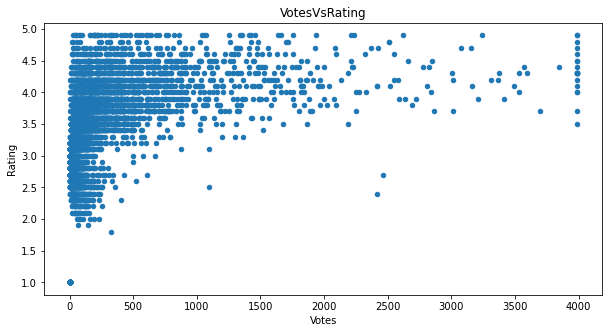

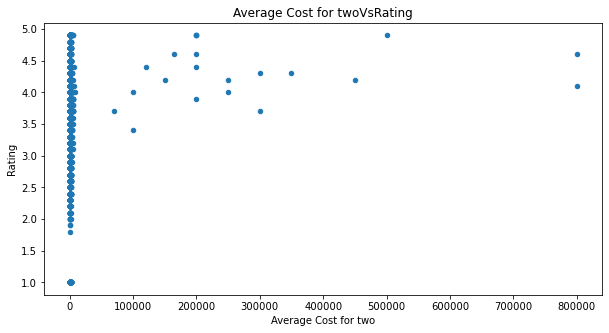

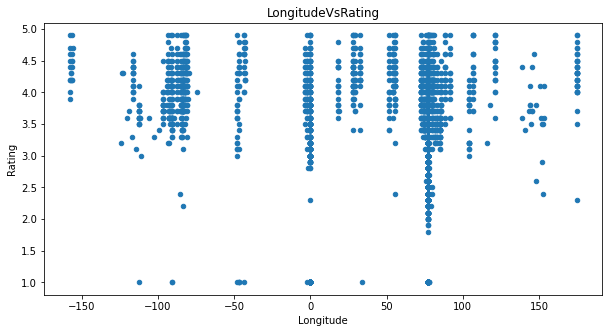

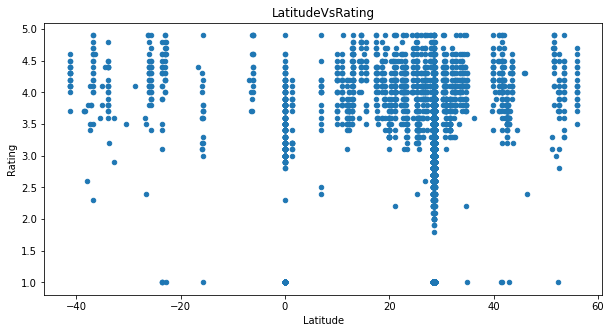

In [20]:
for predictor in ContinuousCols:
    ZomatoData.plot.scatter(x=predictor,y='Rating',figsize = (10,5), title = predictor + "Vs" + "Rating")

# Continuous v/s Continuous: Correlation Value

In [21]:
ContinuousCols = ['Rating','Votes','Average Cost for two','Longitude','Latitude']

In [22]:
CorrelationData = ZomatoData[ContinuousCols].corr()
CorrelationData

,Rating,Votes,Average Cost for two,Longitude,Latitude
Rating,1.000000,0.385249,0.058957,-0.145930,-0.019806
Votes,0.385249,1.000000,0.077563,-0.101381,-0.019687
Average Cost for two,0.058957,0.077563,1.000000,0.045891,-0.111088
Longitude,-0.145930,-0.101381,0.045891,1.000000,0.043207
Latitude,-0.019806,-0.019687,-0.111088,0.043207,1.000000


In [23]:
CorrelationData['Rating'][abs(CorrelationData['Rating'])>0.2]

Rating    1.000000
Votes     0.385249
Name: Rating, dtype: float64

Final Selected columns:       
Votes

# Continuous v/s Categorical: Box-Plot

In [24]:
CategoricalColsList = ['Has Table booking', 'Has Online delivery', 'Price range','CuisinesCount']

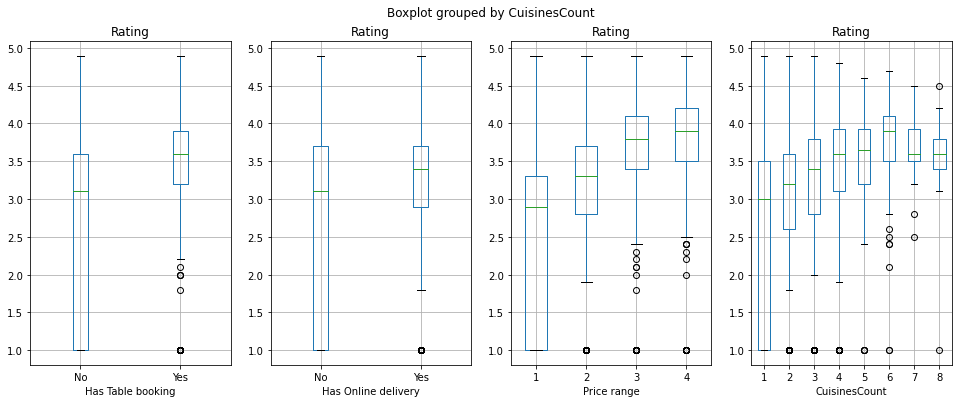

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, PlotCanvas = plt.subplots(nrows = 1,ncols = len(CategoricalColsList), figsize = (16,6))

for predictor, i in zip(CategoricalColsList,range(len(CategoricalColsList))):
    ZomatoData.boxplot(column = 'Rating', by = predictor,ax = PlotCanvas[i])

# Continuous vs Categorical: ANOVA Test 

In [26]:
def FunctionAnova(inpData,TargetVariable,predictorsList):
    from scipy.stats import f_oneway
    
    SelectedPredictors = []
    
    print('#### ANOVA Results ####\n')
    for predictors in predictorsList:
        CategoryGroupList = inpData.groupby(predictors)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupList)
        
        if(AnovaResults[1]<0.05):
            print(predictors, 'is correlated with', TargetVariable,'|P-value:',AnovaResults[1])
            SelectedPredictors.append(predictors)
        else:
            print(predictors,'is no correlated with',TargetVariable, '|P-value:',AnovaResults[1])
            
    return(SelectedPredictors)

In [27]:
FunctionAnova(inpData = ZomatoData,TargetVariable='Rating',predictorsList = CategoricalColsList)

#### ANOVA Results ####

Has Table booking is correlated with Rating |P-value: 3.9393041304297214e-82
Has Online delivery is correlated with Rating |P-value: 1.6952587420575958e-92
Price range is correlated with Rating |P-value: 0.0
CuisinesCount is correlated with Rating |P-value: 2.966761410665348e-136


['Has Table booking', 'Has Online delivery', 'Price range', 'CuisinesCount']

**Final Selected Categorical Columns:**                                         
['Has Table booking', 'Has Online delivery', 'Price range', 'CuisinesCount']

# Final Selected Columns for ML

In [28]:
SelectedColumns = ['Votes','Has Table booking', 'Has Online delivery', 'Price range', 'CuisinesCount']

DataForML = ZomatoData[SelectedColumns]
DataForML.head()

,Votes,Has Table booking,Has Online delivery,Price range,CuisinesCount
0,314,Yes,No,3,3
1,591,Yes,No,3,1
2,270,Yes,No,4,4
3,365,No,No,4,2
4,229,Yes,No,4,2


In [29]:
# Saving this final data for reference during deployment
DataForML.to_pickle('Zomato.pkl')

# Data pre-processing for ML

**Converting the binary columns into numeric using 1/0 mapping**

In [30]:
ZomatoData['Has Table booking'].replace({'Yes':1,'No':0},inplace = True)

In [31]:
ZomatoData['Has Online delivery'].replace({'Yes':1,'No':0},inplace = True)

**Converting the nominal variable to numeric using get_dummies()**

In [32]:
DataForML_numeric = pd.get_dummies(DataForML)

DataForML_numeric['Rating'] = ZomatoData['Rating']

DataForML_numeric.head()

,Votes,Price range,CuisinesCount,Has Table booking_No,Has Table booking_Yes,Has Online delivery_No,Has Online delivery_Yes,Rating
0,314,3,3,0,1,1,0,4.8
1,591,3,1,0,1,1,0,4.5
2,270,4,4,0,1,1,0,4.4
3,365,4,2,1,0,1,0,4.9
4,229,4,2,0,1,1,0,4.8


# Machine Learning: Splitting the data into training and testing

In [33]:
DataForML_numeric.columns

Index(['Votes', 'Price range', 'CuisinesCount', 'Has Table booking_No',
       'Has Table booking_Yes', 'Has Online delivery_No',
       'Has Online delivery_Yes', 'Rating'],
      dtype='object')

In [34]:
TargetVariable = 'Rating'
Predictors = ['Votes', 'Price range', 'CuisinesCount', 'Has Table booking_No',
       'Has Table booking_Yes', 'Has Online delivery_No',
       'Has Online delivery_Yes']

X=DataForML_numeric[Predictors].values
y=DataForML_numeric[TargetVariable].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.3,random_state=156)

# Standardization/Normalization of data

In [35]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6685, 7)
(2866, 7)
(6685,)
(2866,)


# Multiple Linear Regression

In [37]:
# Import Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG = RegModel.fit(X_train,y_train)
prediction = LREG.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 value:',metrics.r2_score(y_train,LREG.predict(X_train)))

####################################################################################################
print('\n####### Model Validation and Accuracy Calculations ########')

# Printing some sample values of prediction
TestingDataResults = pd.DataFrame(data = X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Rating']-TestingDataResults['PredictedRating']))/TestingDataResults['Rating'])

MAPE = np.mean(TestingDataResults['APE'])
MedianMAPE = np.mean(TestingDataResults['APE'])

# Accuracy
MeanAccuracy = 100 - MAPE
MedianAccuracy = 100 - MedianMAPE
print('Mean accuracy is:',MeanAccuracy)
print('Median accuracy is:',MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring = make_scorer(Accuracy_Score,greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values = cross_val_score(RegModel,X,y,cv=10,scoring=custom_Scoring)
print('\nFinal Average Accuracy of the model is:',round(Accuracy_Values.mean(),2))

LinearRegression()
R2 value: 0.31013597781778046

####### Model Validation and Accuracy Calculations ########
   Rating  PredictedRating
0     2.1              2.0
1     4.1              3.0
2     3.2              3.0
3     4.4              3.0
4     3.5              2.0
Mean accuracy is: 57.10142017866329
Median accuracy is: 57.10142017866329

Final Average Accuracy of the model is: 53.91


# Decision Trees

DecisionTreeRegressor(max_depth=3)
R2 value: 0.8921496683759164

##### Model Validation and Accuracy Calculations ##########
   Rating  PredictedRating
0     2.1              3.0
1     4.1              3.0
2     3.2              3.0
3     4.4              4.0
4     3.5              3.0
Mean Accuracy on test data: 91.12543830148354
Median Accuracy on test data: 93.75

Accuracy values for 10-fold Cross Validation:
 [90.33761465 92.18934158 91.77962845 92.3265358  92.7225972  94.62896541
 93.27217346 93.74187012 92.30863523 90.70724959]

Final Average Accuracy of the model: 92.4


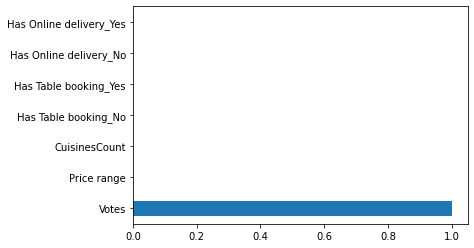

In [38]:
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=3,criterion = 'mse')

print(RegModel)

DT = RegModel.fit(X_train,y_train)
prediction = DT.predict(X_test)

from sklearn import metrics
print('R2 value:',metrics.r2_score(y_train,DT.predict(X_train)))

%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_,index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Rating']-TestingDataResults['PredictedRating']))/TestingDataResults['Rating'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))



# Plotting the Decision tree

In [39]:
!pip install graphviz

In [40]:
!conda install graphviz

Solving environment: ...working... done

# All requested packages already installed.



In [41]:
!pip install pydotplus

In [42]:
import os
os.environ["PATH"] += os.pathsep + 'D:\\anaconda3\\Library\\bin\\graphviz'

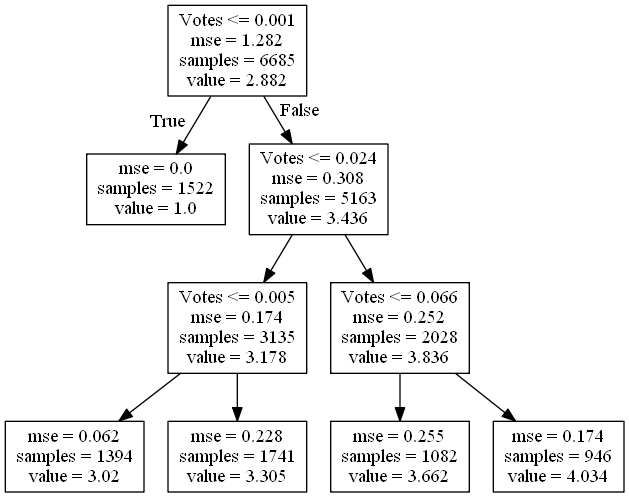

In [43]:
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(RegModel, out_file=None, 
                                feature_names=Predictors, class_names=TargetVariable)

# printing the rules
#print(dot_data)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=5000,height=5000)
# Double click on the graph to zoom in

# Random Forest

RandomForestRegressor(max_depth=2, n_estimators=400)
R2 Value: 0.8814011892792479

##### Model Validation and Accuracy Calculations ##########
   Rating  PredictedRating
0     2.1              3.0
1     4.1              3.0
2     3.2              3.0
3     4.4              4.0
4     3.5              3.0
Mean Accuracy on test data: 91.12543830148354
Median Accuracy on test data: 93.75

Accuracy values for 10-fold Cross Validation:
 [89.26159236 91.69924527 91.43461713 92.31428669 92.26426998 93.91402175
 92.57209402 92.86033793 91.79023818 90.06576316]

Final Average Accuracy of the model: 91.82


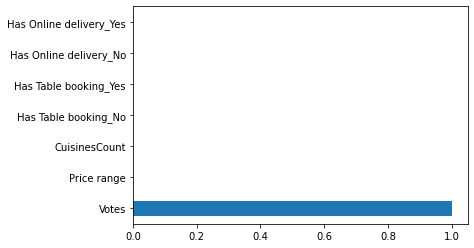

In [44]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=2, n_estimators=400,criterion='mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Rating']-TestingDataResults['PredictedRating']))/TestingDataResults['Rating'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting one of the Decision Trees in Random Forest

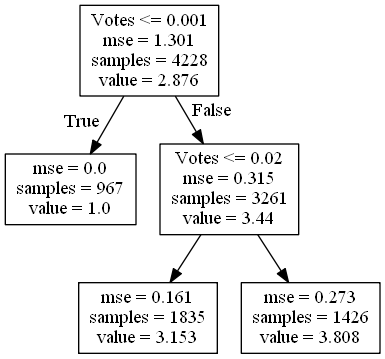

In [45]:
# Plotting a single Decision Tree from Random Forest
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data for the 6th Decision Tree in Random Forest
dot_data = tree.export_graphviz(RegModel.estimators_[5] , out_file=None, feature_names=Predictors, class_names=TargetVariable)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=500,height=500)
# Double click on the graph to zoom in

# AdaBoost

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.04, n_estimators=500)
R2 Value: 0.8925034075687515

##### Model Validation and Accuracy Calculations ##########
   Rating  PredictedRating
0     2.1              3.0
1     4.1              3.0
2     3.2              3.0
3     4.4              3.0
4     3.5              3.0
Mean Accuracy on test data: 91.32751170664095
Median Accuracy on test data: 93.75

Accuracy values for 10-fold Cross Validation:
 [89.80693853 91.76351125 91.86556099 92.3467063  92.52292378 94.2682807
 92.84337299 93.0703719  92.04666265 90.80034348]

Final Average Accuracy of the model: 92.13


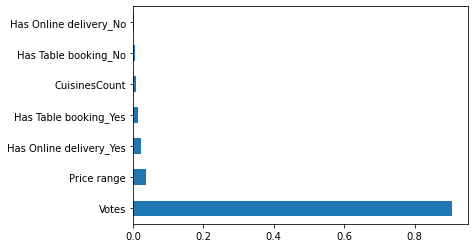

In [46]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 1 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=500, base_estimator=DTR ,learning_rate=0.04)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Rating']-TestingDataResults['PredictedRating']))/TestingDataResults['Rating'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting one of the Decision trees from Adaboost

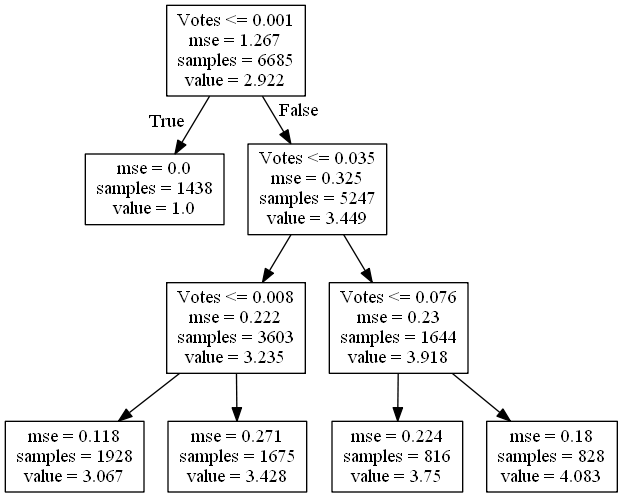

In [47]:
# PLotting 5th single Decision Tree from Adaboost
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data for the 6th Decision Tree in Random Forest
dot_data = tree.export_graphviz(RegModel.estimators_[5] , out_file=None, feature_names=Predictors, class_names=TargetVariable)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=500,height=500)
# Double click on the graph to zoom in

# XGBoost

XGBRegressor(base_score=None, booster='gbtree', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=None, max_depth=2,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', random_state=None, reg_alpha=None,
             reg_lambda=None, scale_pos_weight=None, subsample=None,
             tree_method=None, validate_parameters=None, verbosity=None)
[18:28:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
R2 Value: 0.9190218195330893

##### Model Validation and Accuracy Calculations ##########
   Rating  PredictedRating
0     2.1              3.0
1     4.1              3.0
2   

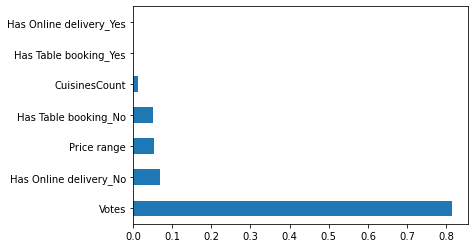

In [48]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2, 
                      learning_rate=0.1, 
                      n_estimators=1000, 
                      objective='reg:linear', 
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Rating']-TestingDataResults['PredictedRating']))/TestingDataResults['Rating'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting a single Decision tree out of XGBoost

<AxesSubplot:>

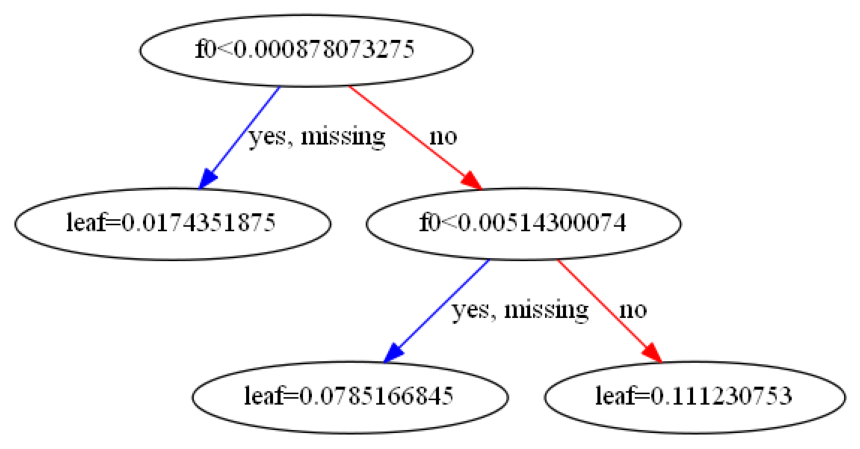

In [49]:
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plot_tree(XGB, num_trees=10, ax=ax)